In [1]:
import pandas as pd
from data_apis import MyModel
import optuna

In [2]:
#remove xgboost study from sqlite database
# optuna.delete_study(study_name="logistic_regression_2016", storage="sqlite:///./optuna_studies/studies_v1.db")
# optuna.delete_study(study_name="logistic_regression_2017", storage="sqlite:///./optuna_studies/studies_v1.db")
# optuna.delete_study(study_name="logistic_regression_2018", storage="sqlite:///./optuna_studies/studies_v1.db")
# optuna.delete_study(study_name="logistic_regression_2019", storage="sqlite:///./optuna_studies/studies_v1.db")
# optuna.delete_study(study_name="logistic_regression_2020", storage="sqlite:///./optuna_studies/studies_v1.db")
# optuna.delete_study(study_name="logistic_regression_2021", storage="sqlite:///./optuna_studies/studies_v1.db")
# optuna.delete_study(study_name="logistic_regression_2022", storage="sqlite:///./optuna_studies/studies_v1.db")
# optuna.delete_study(study_name="logistic_regression_2023", storage="sqlite:///./optuna_studies/studies_v1.db")
# optuna.delete_study(study_name="dummy_full", storage="sqlite:///./optuna_studies/studies_v1.db")

In [3]:
my_model = MyModel(file_path="C:\\Users\\David Trade\\my_data\\automatic")
my_model.load_from_file(file_name="merged_data.csv", test_periods=12)
my_model.df_preparation()

In [4]:
df_eval_year = my_model.evaluate_yearly_models_monthly()
df_eval_full = my_model.evaluate_all_models_monthly()

Evaluating decision_tree_model_2016 → test_year=2018
Evaluating decision_tree_model_2017 → test_year=2019
Evaluating decision_tree_model_2018 → test_year=2020
Evaluating decision_tree_model_2019 → test_year=2021
Evaluating decision_tree_model_2020 → test_year=2022
Evaluating decision_tree_model_2021 → test_year=2023
Evaluating decision_tree_model_2022 → test_year=2024
Evaluating dummy_model_2016 → test_year=2018
Evaluating dummy_model_2017 → test_year=2019
Evaluating dummy_model_2018 → test_year=2020
Evaluating dummy_model_2019 → test_year=2021
Evaluating dummy_model_2020 → test_year=2022
Evaluating dummy_model_2021 → test_year=2023
Evaluating dummy_model_2022 → test_year=2024
Evaluating gradient_boosting_model_2016 → test_year=2018
Evaluating gradient_boosting_model_2017 → test_year=2019
Evaluating gradient_boosting_model_2018 → test_year=2020
Evaluating gradient_boosting_model_2019 → test_year=2021
Evaluating gradient_boosting_model_2020 → test_year=2022
Evaluating gradient_boosting_

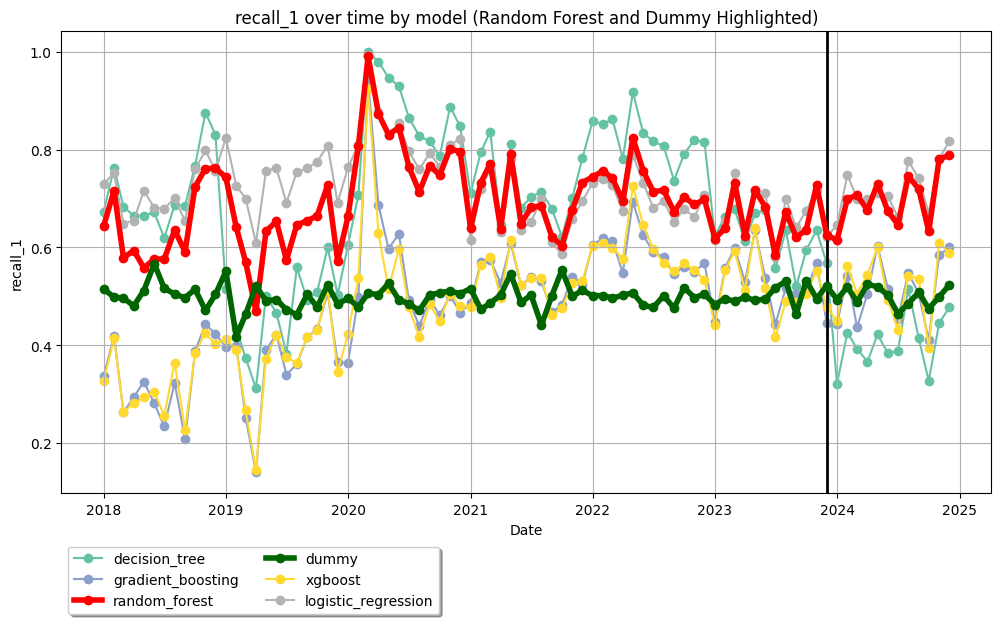

In [11]:
my_model.plot_metric_over_time(df_eval_year, metric_col="recall_1")

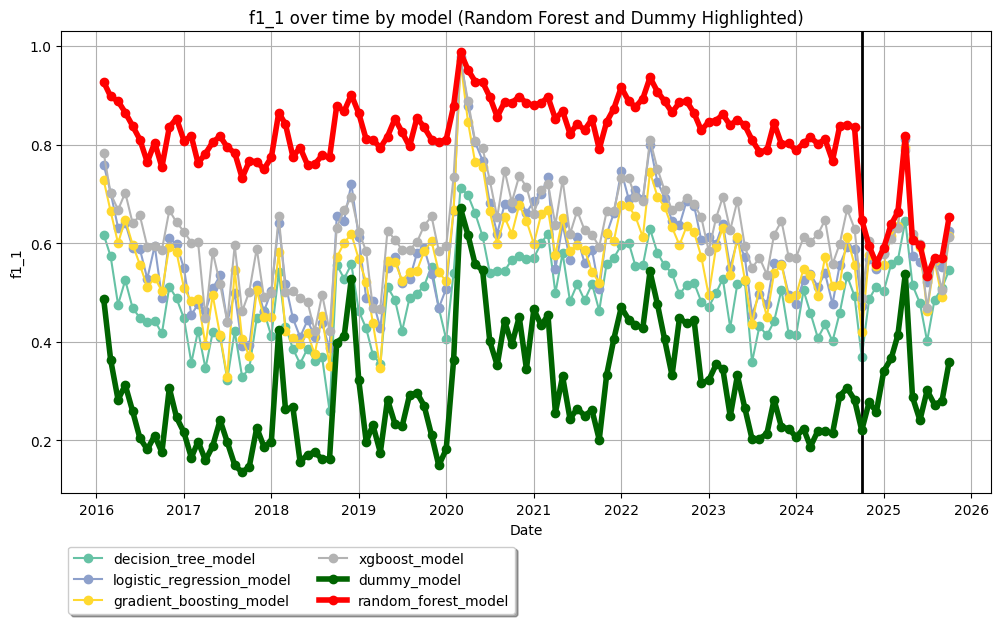

In [9]:
my_model.plot_metric_over_time(df_eval_full, metric_col="f1_1")

In [ ]:
my_model.dummy_hyperparameters_selection()
my_model.show_study_results()

In [ ]:
splitted = my_model.get_rolling_window_splits(date_col="date", train_months=24, test_months=12)
for index, df_split in enumerate(splitted):
    splitted_model = MyModel(file_path="C:\\Users\\David Trade\\my_data\\automatic",start_year=df_split['date'].iloc[0].year)
    splitted_model.load_from_organized_df(df=df_split.copy(),test_periods=12)
    splitted_model.dummy_hyperparameters_selection()
    print(f"Results for split starting in year {df_split['date'].iloc[0].year}:")
    splitted_model.show_study_results()